![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 2. Preparación de datos

Una vez entendido el contexto de la problemática y realizado el análisis exploratorio de datos de acuerdo con la descripción del dataset y la información entregada al equipo en la fase anterior, se comparte un paso a paso que deberá ser diligenciado por el equipo de ciencia de datos asignado para esta tarea con el fin de guiar el proceso de EDA y preparación de datos, lo cual es crucial antes de desarollar el modelamiento. 

El estudio tiene como objetivo la clasificación de un paciente como hospitalizado o no hospitalizado.




Carguen la base de datos y revisen el tipo de cada columna del dataset. Si es necesario realicen conversiones de tipos de datos. 

In [312]:
import pandas as pd
import numpy as np
import seaborn as sns

In [313]:
df=pd.read_excel('BBDD_Hospitalización.xlsx') # leer tabla y revisar
df.head()

/home/frangr94/.local/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0


In [314]:
df.rename(columns={'EDAD':'edad',
                   'DIABETES':'diabetes',
                   'HOSPITALIZACIÓN ULTIMO MES':'hospitalizacionUltimoMes',
                   'PSA':'psa',
                   'BIOPSIAS PREVIAS':'biopsiasPrevias',
                   'VOLUMEN PROSTATICO':'volumenProstatico',
                   'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS':'antibioticoProfilaxis',
                   'NUMERO DE MUESTRAS TOMADAS':'muestrasTomadas',
                   'CUP':'cup',
                   'ENF. CRONICA PULMONAR OBSTRUCTIVA':'enfCronicaObstructiva',
                   'BIOPSIA':'biopsia',
                   'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA':'diasComplicacionPostBiopsia',
                   'FIEBRE':'fiebre',
                   'TIPO DE CULTIVO':'tipoCultivo',
                   'AGENTE AISLADO':'agenteAislado',
                   'PATRON DE RESISTENCIA':'patronResistencia',
                   'HOSPITALIZACION':'hospitalizacion',
                   'DIAS HOSPITALIZACION MQ': 'diasHospitalizacionMQ',
                   'DIAS HOSPITALIZACIÓN UPC':'diasHospitalizacionUPC',
                   'ITU':'itu'
                   }, inplace=True) # renombrar columnas para facilitar el trabajo en el dataset

Eliminen variables si es que consideran irrelevantes, sustentando adecuadamente por qué.

In [315]:
# ya que dias de hospitalizacion MQ/UPC suceden con posterioridad al hecho que queremos pronosticar (si el paciente sera internado), las dropeamos
# es decir, no explican si un paciente quedará hospitalizado o no
df.drop(columns=['diasHospitalizacionMQ','diasHospitalizacionUPC'],inplace=True)

Revisen la distribución estadística para el caso de las variables numéricas. ¿Qué gráficos permiten realizar un estudio exploratorio de la distribución? ¿Hay datos atípicos?

array([[<Axes: title={'center': 'edad'}>,
        <Axes: title={'center': 'psa'}>],
       [<Axes: title={'center': 'muestrasTomadas'}>, <Axes: >]],
      dtype=object)

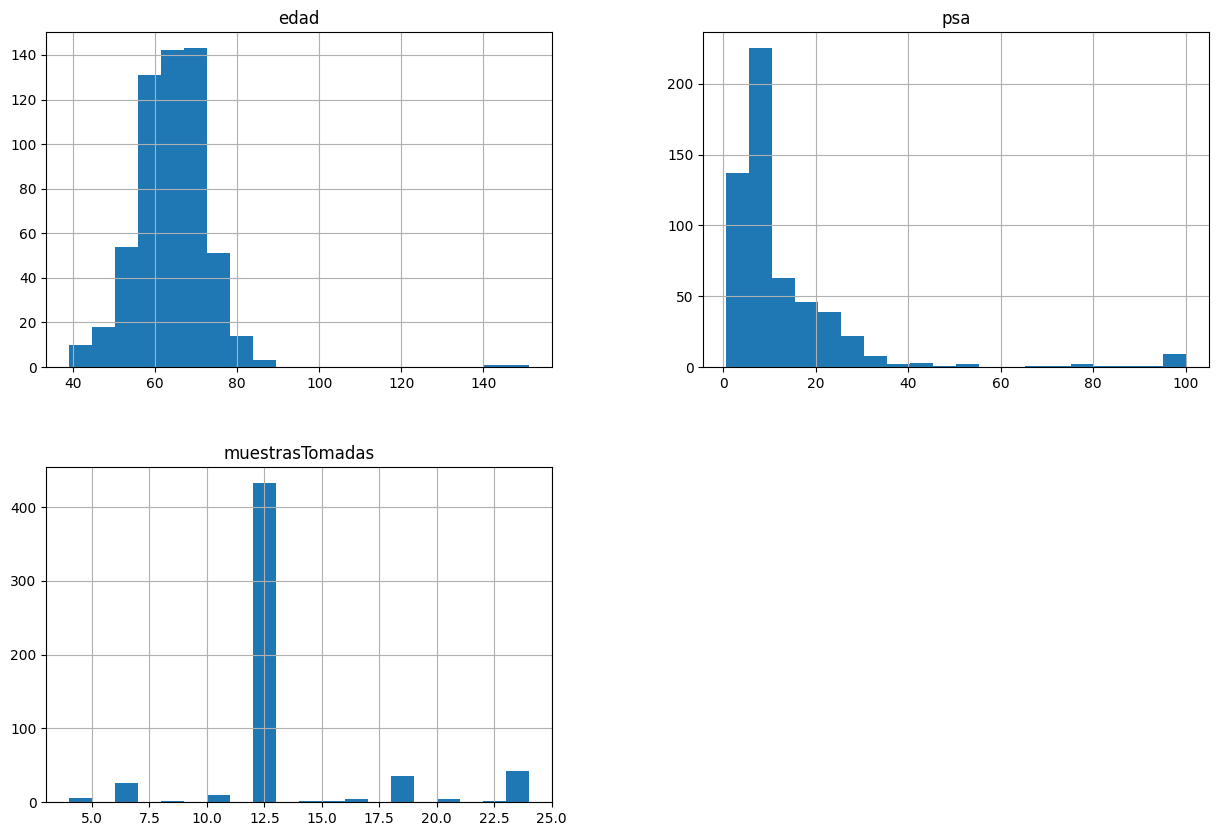

In [316]:
df.hist(bins=20,figsize=(15,10)) # ver histogramas para todos los campos numericos

Si encontraron datos atípicos, ¿Imputarán o eliminarán los valores? Sustentar.

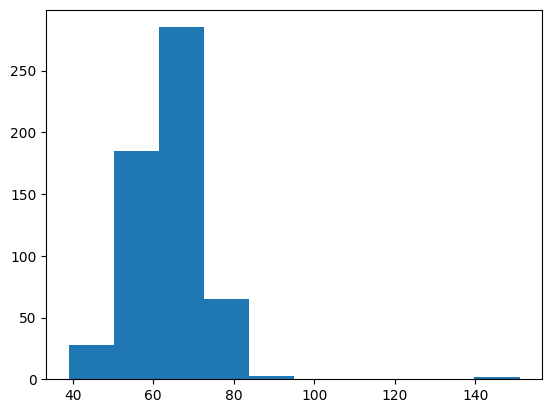

In [317]:
import matplotlib.pyplot as plt
plt.hist(df['edad'],bins=10)
plt.show()
# hay valores extraños (150 años) --> las edades máximas suelen ser de 125 años (122 es el maximo registro) --> dropear registros con mas de 125 años

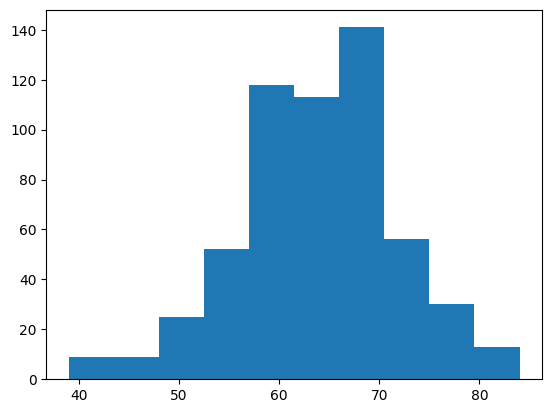

In [318]:
df = df[df['edad']<126] # ahora si la edad no tiene outliers
plt.hist(df['edad'],bins=10)
plt.show()

Para las variables categóricas, realizar una visualización adecuada para observar las frecuencias de cada categoría. ¿Observa alguna anomalía, problema de formato en alguna variable?

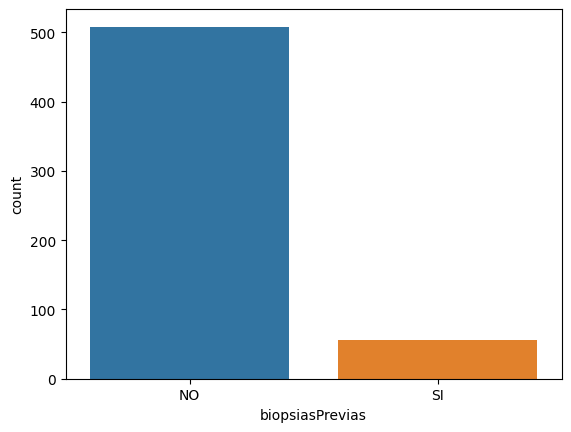

In [319]:
sns.countplot(x='biopsiasPrevias',data=df) #biopsias previas
plt.show()

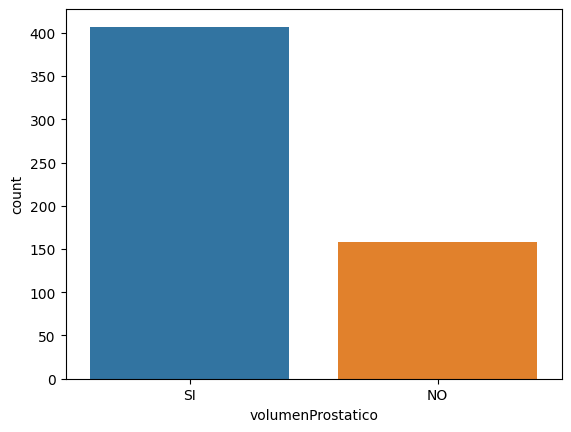

In [320]:
sns.countplot(x='volumenProstatico',data=df) # volumen prostatico
plt.show()

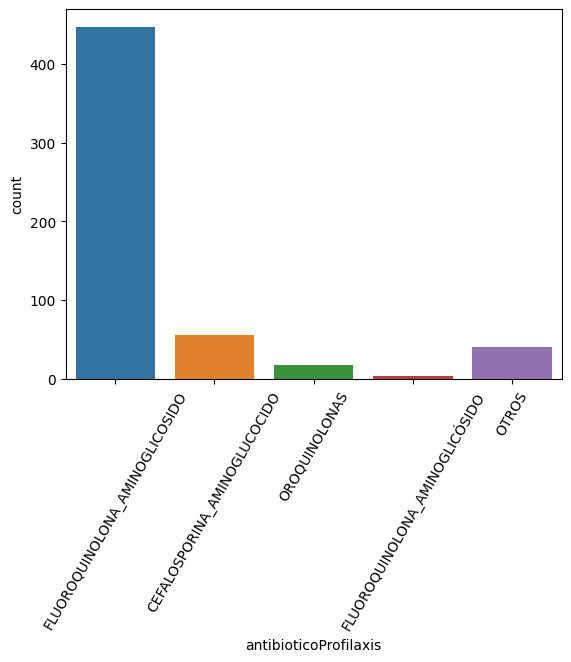

In [321]:
sns.countplot(x='antibioticoProfilaxis',data=df)
plt.xticks(rotation=60)
plt.show()

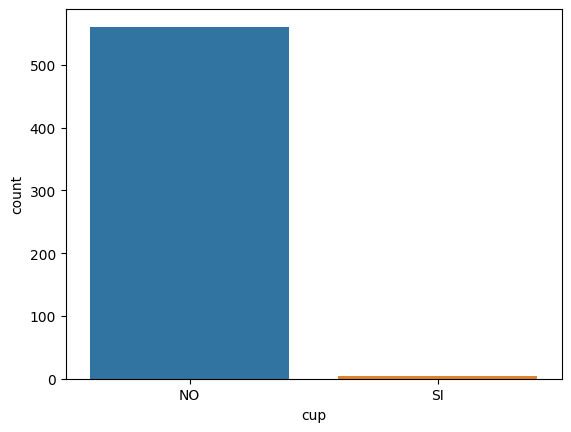

In [322]:
sns.countplot(x='cup',data=df)
plt.show()

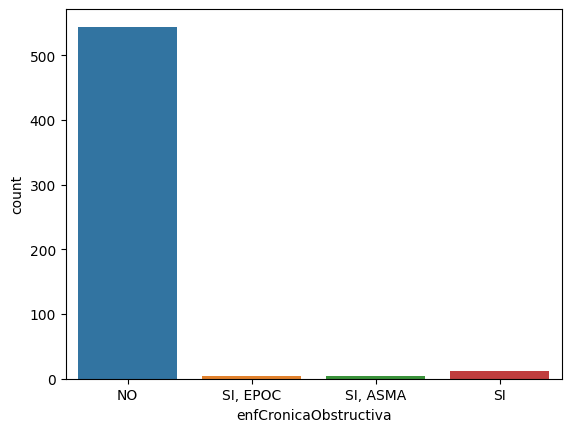

In [323]:
sns.countplot(x='enfCronicaObstructiva',data=df)
plt.show()

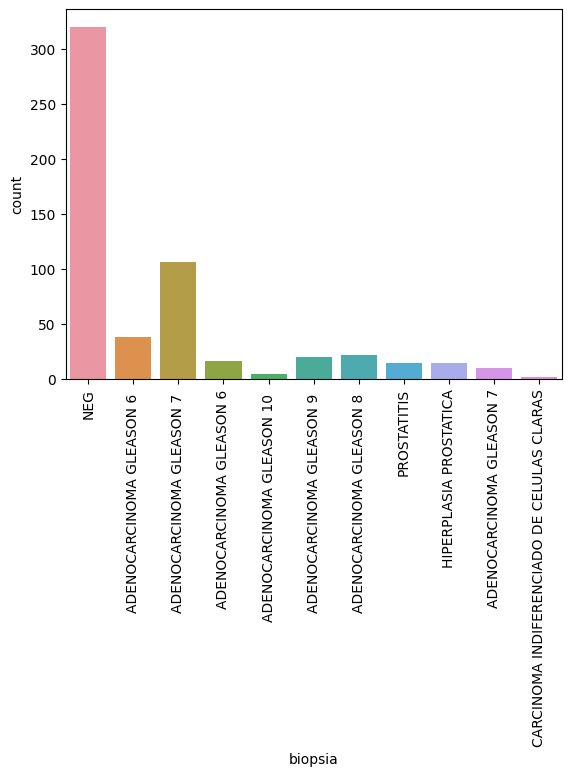

In [324]:
sns.countplot(x='biopsia',data=df)
plt.xticks(rotation=90)
plt.show()

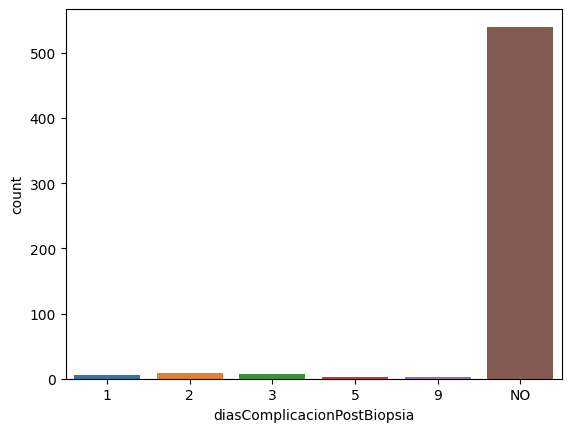

In [325]:
sns.countplot(x='diasComplicacionPostBiopsia',data=df)
plt.show()

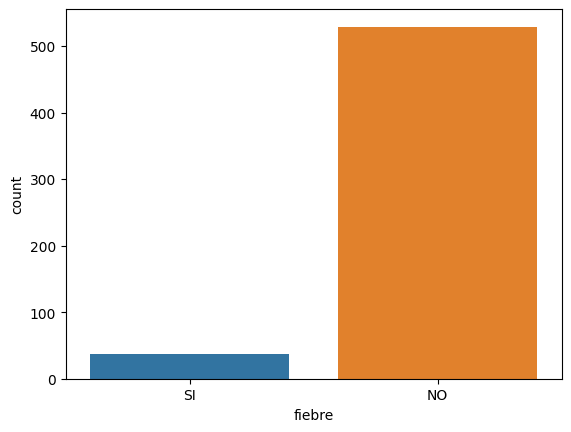

In [326]:
sns.countplot(x='fiebre',data=df)
plt.show()

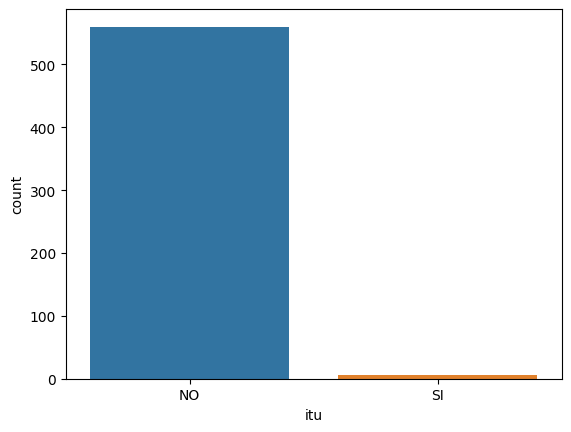

In [327]:
sns.countplot(x='itu', data=df)
plt.show()

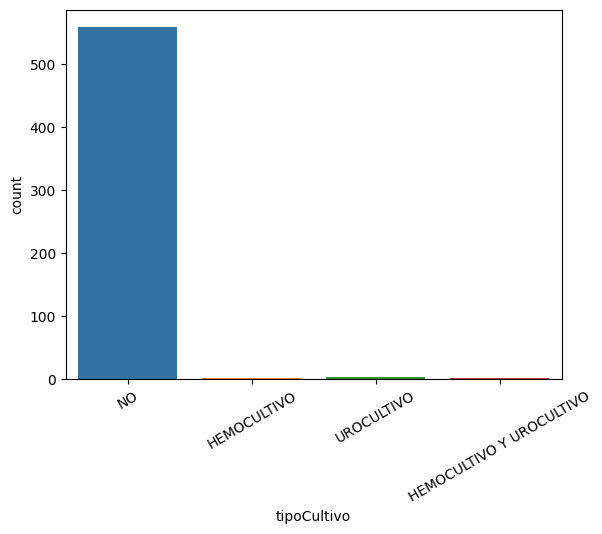

In [328]:
sns.countplot(x='tipoCultivo', data=df)
plt.xticks(rotation=30)
plt.show()

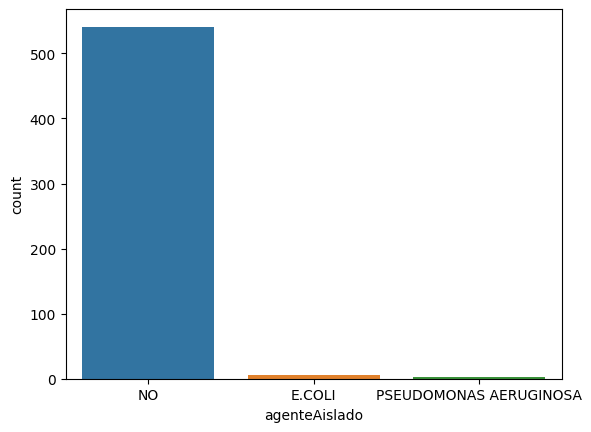

In [329]:
sns.countplot(x='agenteAislado', data=df)
plt.show()

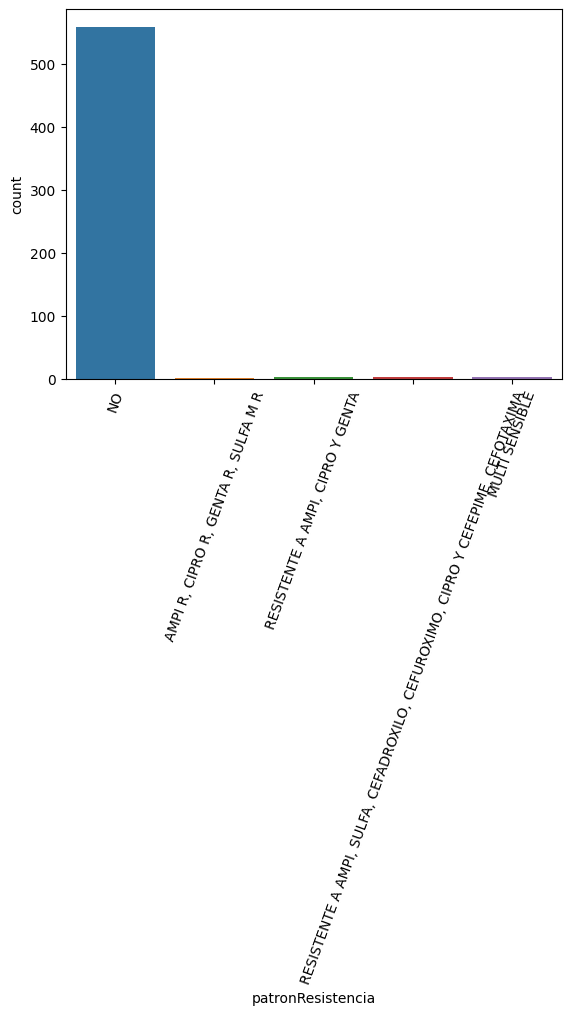

In [330]:
sns.countplot(x='patronResistencia', data=df)
plt.xticks(rotation=70) # quitamos los ticks ya que no interesa en este caso el nombre del patogeno, sino la distribucion
plt.show()

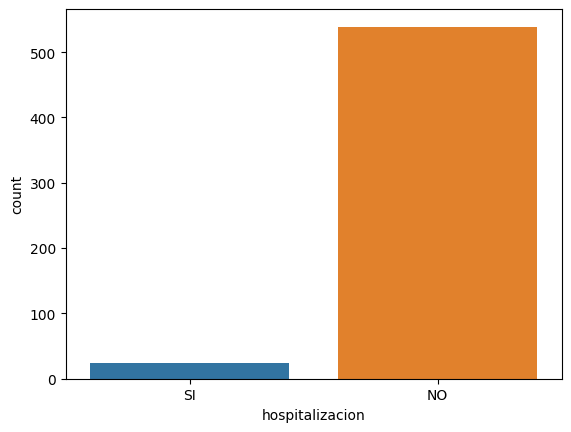

In [331]:
sns.countplot(x='hospitalizacion', data=df) # es necesario balancear este dataset --> undersampling, oversampling (70-30 ya habria que realizarlo)
plt.show()

Revisen la cantidad de nulos que tiene cada columna. ¿Es necesario eliminar alguna columna? ¿Se imputarán valores? En caso de imputar, explicar en cada caso, por medio de qué estrategia lo harán. 

In [332]:
df.isna().sum() #chequear nulos -> se puede apreciar que hay algunos, es necesario ver que otra data contienen los registros

edad                            0
diabetes                        0
hospitalizacionUltimoMes        0
psa                             4
biopsiasPrevias                 2
volumenProstatico               1
antibioticoProfilaxis           0
muestrasTomadas                 0
cup                             1
enfCronicaObstructiva           2
biopsia                         0
diasComplicacionPostBiopsia     0
fiebre                          0
itu                             0
tipoCultivo                     0
agenteAislado                  17
patronResistencia               0
hospitalizacion                 3
dtype: int64

In [333]:
df[df.isna()] # estos registros no son muy útiles ni imputables --> borrar

,edad,diabetes,hospitalizacionUltimoMes,psa,biopsiasPrevias,volumenProstatico,antibioticoProfilaxis,muestrasTomadas,cup,enfCronicaObstructiva,biopsia,diasComplicacionPostBiopsia,fiebre,itu,tipoCultivo,agenteAislado,patronResistencia,hospitalizacion
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [334]:
df.dropna(inplace=True)

Para el caso de las variables numéricas, ¿Es necesario normalizar?

array([[<Axes: title={'center': 'edad'}>,
        <Axes: title={'center': 'psa'}>],
       [<Axes: title={'center': 'muestrasTomadas'}>, <Axes: >]],
      dtype=object)

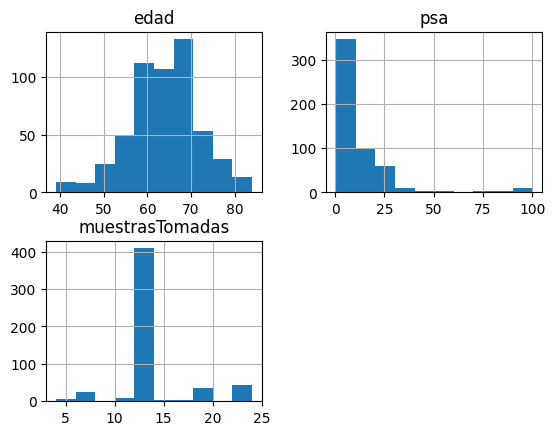

In [335]:
df.hist() # consideraria que no, ya que los datos no se encuentran en rangos muy grandes

In [336]:
# ver outliers en psa
def detect_outliers(data):
    outliers=[]
    threshold=3
    mean=np.mean(data)
    std=np.std(data)

    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers

outliers_psa=detect_outliers(df.psa)
df.drop(df[df['psa']>=min(outliers_psa)].index,inplace=True)

array([[<Axes: title={'center': 'edad'}>,
        <Axes: title={'center': 'psa'}>],
       [<Axes: title={'center': 'muestrasTomadas'}>, <Axes: >]],
      dtype=object)

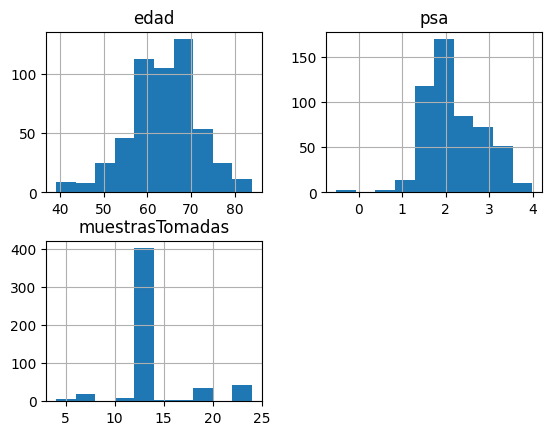

In [337]:
# psa esta un poco sesgado, aplico log para normalizar
df.psa = np.log(df.psa)
df.hist()

In [338]:
df.biopsia.unique() # dado que son distintas patologias con distintas gravedades, hay que mappear a mano
df.biopsia=df.biopsia.str.strip()

scale_mapper = {
    "NEG":0,
    "PROSTATITIS":1,
    "HIPERPLASIA PROSTATICA":2,
    "ADENOCARCINOMA GLEASON 6":4,
    "ADENOCARCINOMA GLEASON 7":5,
    "ADENOCARCINOMA GLEASON 8":6,
    "ADENOCARCINOMA GLEASON 9":7,
    "ADENOCARCINOMA GLEASON 10":8,
    "CARCINOMA INDIFERENCIADO DE CELULAS CLARAS":9      
                }

df['biopsia_n']=df.biopsia.replace(scale_mapper)
df.drop(columns='biopsia',inplace=True)

# cambio no por 0
df['diasComplicacionPostBiopsia']=df['diasComplicacionPostBiopsia'].replace('NO',0)
df['diasComplicacionPostBiopsia']=df['diasComplicacionPostBiopsia'].astype(int)

Realice las transformaciones que considere pertinentes con el fin de preparar los datos para un modelo de clasificación de un paciente con desenlace en Hospitalización. 

In [339]:
# habria que cambiar las variables categoricas a numericas
# separo categoricas de numericas / variable objetivo
df_num = pd.DataFrame(df.select_dtypes([int,float])).reset_index()
df_cat = pd.DataFrame(df.select_dtypes(object)).reset_index()

In [340]:
df_cat_ohe=pd.DataFrame()
for i in df_cat:
    if i!='index':
        scaled = pd.get_dummies(df_cat[i],dtype=int,prefix=i)
        for z in scaled:
            df_cat_ohe[z]=scaled[z]
    else:
        df_cat_ohe[i]=df_cat[i]


In [341]:
df = df_num.merge(df_cat_ohe, on='index')

In [342]:
df

,index,edad,psa,muestrasTomadas,diasComplicacionPostBiopsia,biopsia_n,diabetes_NO,diabetes_SI,hospitalizacionUltimoMes_NO,hospitalizacionUltimoMes_SI,...,agenteAislado_E.COLI,agenteAislado_NO,agenteAislado_PSEUDOMONAS AERUGINOSA,"patronResistencia_ AMPI R, CIPRO R, GENTA R, SULFA M R",patronResistencia_MULTI SENSIBLE,patronResistencia_NO,"patronResistencia_RESISTENTE A AMPI, CIPRO Y GENTA","patronResistencia_RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA",hospitalizacion_NO,hospitalizacion_SI
0,0,53.0,1.386294,12.0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
1,1,56.0,2.041220,12.0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
2,2,57.0,3.367296,24.0,1,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
3,3,56.0,1.945910,12.0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
4,4,55.0,3.367296,24.0,1,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,559,70.0,2.890372,12.0,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
519,560,57.0,1.568616,12.0,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
520,562,78.0,2.230014,12.0,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
521,563,67.0,1.791759,12.0,0,4,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [343]:
# conversion a numerico sin ohe
'''df.diabetes=df.diabetes.astype('category')
df['diabates_n']=df.diabetes.cat.codes
df.drop(columns='diabetes', inplace=True)

df.hospitalizacionUltimoMes=df.hospitalizacionUltimoMes.astype('category')
df['hospitalizacionUltimoMes_n']=df.hospitalizacionUltimoMes.cat.codes
df.drop(columns='hospitalizacionUltimoMes',inplace=True)

df.biopsiasPrevias=df.biopsiasPrevias.astype('category')
df['biopsiasPrevias_n']=df.biopsiasPrevias.cat.codes
df.drop(columns='biopsiasPrevias',inplace=True)

df.volumenProstatico=df.volumenProstatico.astype('category')
df['volumenProstatico_n']=df.volumenProstatico.cat.codes
df.drop(columns='volumenProstatico',inplace=True)

df.antibioticoProfilaxis=df.antibioticoProfilaxis.astype('category')
df['antibioticoProfilaxis_n']=df.antibioticoProfilaxis.cat.codes
df.drop(columns='antibioticoProfilaxis',inplace=True)

df.cup=df.cup.astype('category')
df['cup_n']=df.cup.cat.codes
df.drop(columns='cup',inplace=True)
df.enfCronicaObstructiva=df.enfCronicaObstructiva.astype('category')
df['enfCronicaObstructiva_n']=df.enfCronicaObstructiva.cat.codes
df.drop(columns='enfCronicaObstructiva',inplace=True)

df.fiebre=df.fiebre.astype('category')
df['fiebre_n']=df.fiebre.cat.codes
df.drop(columns='fiebre',inplace=True)

df.itu=df.itu.astype('category')
df['itu_n']=df.itu.cat.codes
df.drop(columns='itu',inplace=True)

df.tipoCultivo=df.tipoCultivo.astype('category')
df['tipoCultivo_n']=df.tipoCultivo.cat.codes
df.drop(columns='tipoCultivo',inplace=True)

df.agenteAislado=df.agenteAislado.astype('category')
df['agenteAislado_n']=df.agenteAislado.cat.codes
df.drop(columns='agenteAislado',inplace=True)

df.patronResistencia=df.patronResistencia.astype('category')
df['patronResistencia_n']=df.patronResistencia.cat.codes
df.drop(columns='patronResistencia',inplace=True)

df.hospitalizacion=df.hospitalizacion.astype('category')
df['hospitalizacion_n']=df.hospitalizacion.cat.codes
df.drop(columns='hospitalizacion',inplace=True)
'''

"df.diabetes=df.diabetes.astype('category')\ndf['diabates_n']=df.diabetes.cat.codes\ndf.drop(columns='diabetes', inplace=True)\n\ndf.hospitalizacionUltimoMes=df.hospitalizacionUltimoMes.astype('category')\ndf['hospitalizacionUltimoMes_n']=df.hospitalizacionUltimoMes.cat.codes\ndf.drop(columns='hospitalizacionUltimoMes',inplace=True)\n\ndf.biopsiasPrevias=df.biopsiasPrevias.astype('category')\ndf['biopsiasPrevias_n']=df.biopsiasPrevias.cat.codes\ndf.drop(columns='biopsiasPrevias',inplace=True)\n\ndf.volumenProstatico=df.volumenProstatico.astype('category')\ndf['volumenProstatico_n']=df.volumenProstatico.cat.codes\ndf.drop(columns='volumenProstatico',inplace=True)\n\ndf.antibioticoProfilaxis=df.antibioticoProfilaxis.astype('category')\ndf['antibioticoProfilaxis_n']=df.antibioticoProfilaxis.cat.codes\ndf.drop(columns='antibioticoProfilaxis',inplace=True)\n\ndf.cup=df.cup.astype('category')\ndf['cup_n']=df.cup.cat.codes\ndf.drop(columns='cup',inplace=True)\ndf.enfCronicaObstructiva=df.enfC

Realice una matriz de correlación con el fin de determinar si hay variables redundantes. En caso de encontrar altas correlaciones, ¿Tomará alguna acción?

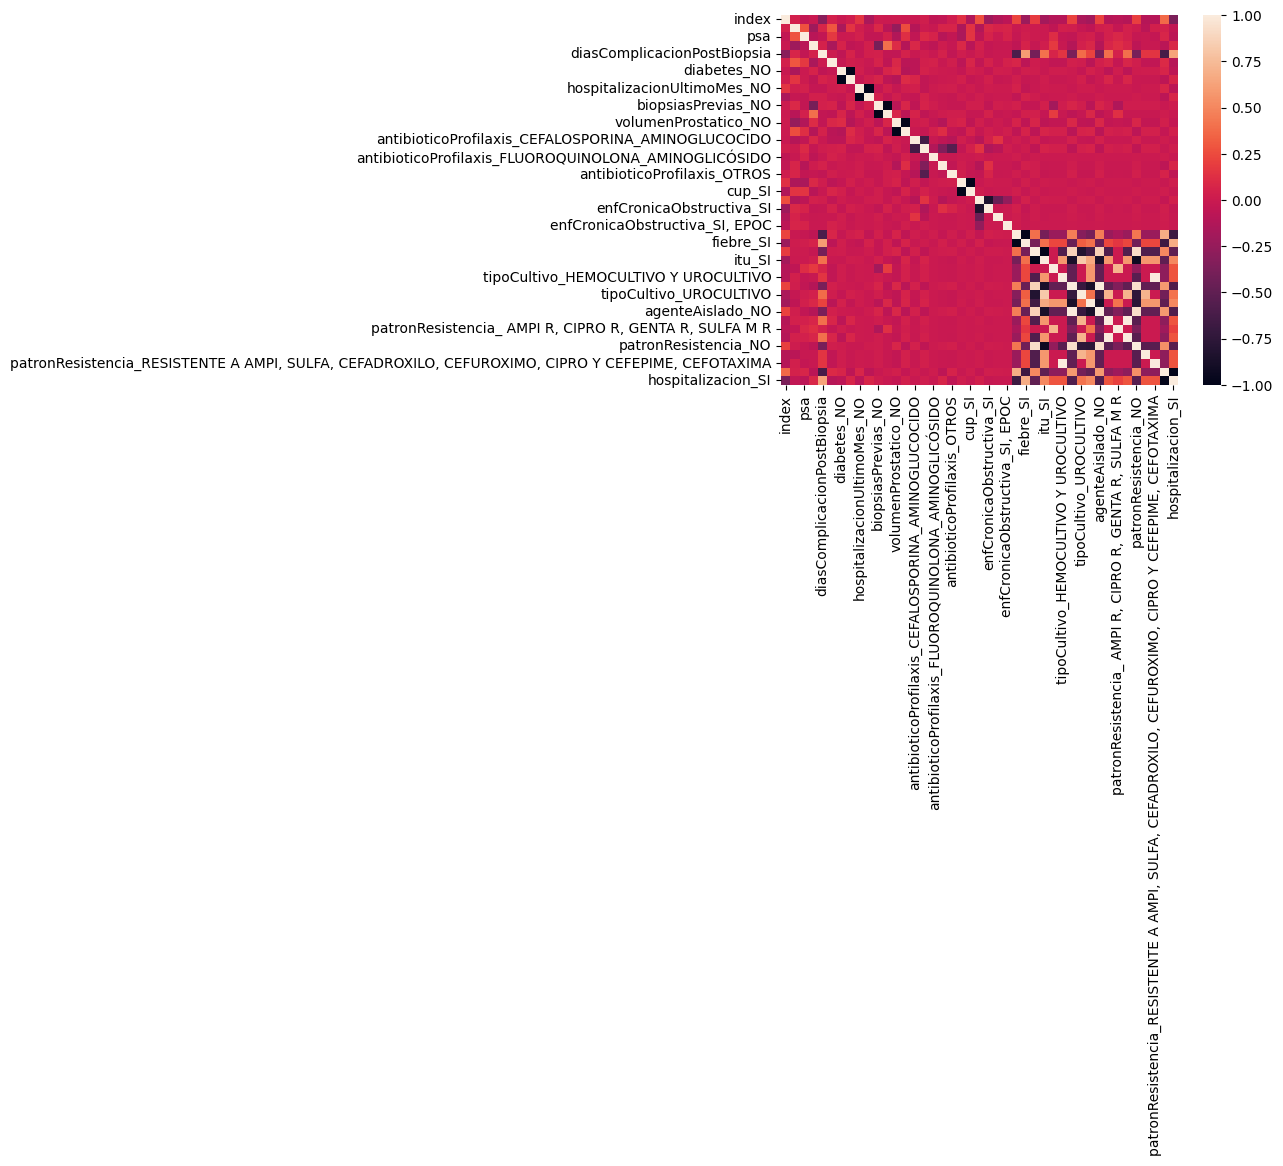

In [344]:
sns.heatmap(df.corr())
plt.show()

Exporte la base de datos preparada en un archivo .csv para el modelamiento. 

In [345]:
corr=df.corr()
hosp_corr=corr['hospitalizacion_SI']
hosp_corr=pd.DataFrame(hosp_corr)
hosp_corr

,hospitalizacion_SI
index,-0.371349
edad,-0.049256
psa,-0.070884
muestrasTomadas,0.082521
diasComplicacionPostBiopsia,0.626465
biopsia_n,-0.100948
diabetes_NO,-0.065582
diabetes_SI,0.065582
hospitalizacionUltimoMes_NO,-0.074759
hospitalizacionUltimoMes_SI,0.074759


In [346]:
hosp_corr=hosp_corr.loc[hosp_corr['hospitalizacion_SI']>0.2] # al exportar el dataset, nos quedaremos con estas variables dado que son las que mejor explican
hosp_corr

,hospitalizacion_SI
diasComplicacionPostBiopsia,0.626465
fiebre_SI,0.678347
itu_SI,0.502286
tipoCultivo_HEMOCULTIVO,0.288880
tipoCultivo_HEMOCULTIVO Y UROCULTIVO,0.288880
tipoCultivo_UROCULTIVO,0.409324
agenteAislado_E.COLI,0.502286
agenteAislado_PSEUDOMONAS AERUGINOSA,0.288880
"patronResistencia_ AMPI R, CIPRO R, GENTA R, SULFA M R",0.204073
patronResistencia_MULTI SENSIBLE,0.288880


In [347]:
df=df[hosp_corr.index.values] # me voy a quedar solo con las variables con correlacion>0.5 (puede cambiarse para complejizar/simplificar)

In [348]:
# voy a ver que pasa si no tomo en cuenta diasComplicacion, fiebre e itu, que son razones directas para quedar internado tras una biopsia de prostata
df.drop(columns=['diasComplicacionPostBiopsia'],inplace=True) # al parecer, la culpable del nivel de overfittin, era diasComplicacion

/tmp/ipykernel_2364/3267800448.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['diasComplicacionPostBiopsia'],inplace=True)


In [349]:
df

,fiebre_SI,itu_SI,tipoCultivo_HEMOCULTIVO,tipoCultivo_HEMOCULTIVO Y UROCULTIVO,tipoCultivo_UROCULTIVO,agenteAislado_E.COLI,agenteAislado_PSEUDOMONAS AERUGINOSA,"patronResistencia_ AMPI R, CIPRO R, GENTA R, SULFA M R",patronResistencia_MULTI SENSIBLE,"patronResistencia_RESISTENTE A AMPI, CIPRO Y GENTA","patronResistencia_RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA",hospitalizacion_SI
0,1,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,1
2,1,0,1,0,0,1,0,1,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,1
4,1,0,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
518,0,0,0,0,0,0,0,0,0,0,0,0
519,0,0,0,0,0,0,0,0,0,0,0,0
520,0,0,0,0,0,0,0,0,0,0,0,0
521,0,0,0,0,0,0,0,0,0,0,0,0


In [350]:
# al preprocesar la data, va a ser necesario realizar un oversampling
len(df)

523

In [351]:
df.to_csv('hospitalizacion_modelado.csv',index=False)